La documentación utilizada es vista en
- https://pandas.pydata.org/docs/user_guide/dsintro.html#alternate-constructors
- https://www.w3schools.com/python/matplotlib_pie_charts.asp

### Importación de datos



In [77]:
# Importación de Paquetes para datos y operaciones.
import math
import pandas as pd

In [78]:
# Importación de las tiendas.csv

url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


## 0. Preparación para recapitulación de datos.

In [79]:
# Variables
tiendas = [tienda, tienda2, tienda3, tienda4]

#Fila Principal de las tablas generales
nombresTiendas = ['Tienda 1','Tienda 2','Tienda 3','Tienda 4']
# Columas de la tabla de Categorias.
columnasCategorias = ['Ventas (tienda 1)','Ingreso total (tienda 1)',
                      'Ventas (tienda 2)','Ingreso total (tienda 2)',
                      'Ventas (tienda 3)','Ingreso total (tienda 3)',
                      'Ventas (tienda 4)','Ingreso total (tienda 4)']

# Columnas para la creacion de tabla de productos.
columnasProductos = ['Ventas (tienda 1)','Ingreso total (tienda 1)',
                     'Ventas (tienda 2)','Ingreso total (tienda 2)',
                     'Ventas (tienda 3)','Ingreso total (tienda 3)',
                     'Ventas (tienda 4)','Ingreso total (tienda 4)']

In [80]:
# Tabla de datos por Categoria: nameMax/minIVCategoría max/minIngresoVentas/Venta, ventas/ingresoVentasDelMax/Min, max/minVentas/IngresoVentas
tablaDatosCategoria = pd.DataFrame({'Nombre de las Tiendas': nombresTiendas})

# Tabla de datos por Producto: nameMax/minIVCategoría max/minIngresoVentas/Venta, ventas/ingresoVentasDelMax/Min, max/minVentas/IngresoVentas
tablaDatosProducto = pd.DataFrame({'Nombre de las Tiendas': nombresTiendas})

# Tabla de datos generales: Ingreso Total, Calificacion Promedio, Costo de envio Promedio
tablaDatos = pd.DataFrame(index=nombresTiendas)

# Tabla para la visualizacion de ventas e ingresos totales por categoría.
tablaDeCategorias = pd.DataFrame(columns = columnasCategorias)

# Tabla para visualizar ventas e ingresos totales por productos.
tablaDeProductos = pd.DataFrame(columns = columnasProductos)

In [81]:
# Proporciona una tabla de porcentajes.
def tablaPorcentaje (tabla):
  return (tabla.copy()*100/tabla.sum()).round(2)

#1. Análisis de facturación



### 1.1 Funciones para el análisis de facturación.
Ingreso total y Ventas totales por Tienda.

In [82]:
# Ingreso total de la tienda.
def ingresoTotal (tienda):
    return tienda['Precio'].sum()

In [83]:
# Ventas de la tienda.
def ventaTotal (tienda):
    return tienda['Producto'].count()

In [84]:
# Ingresos brutos.
def ingresosBrutos (tienda):
    return tienda['Precio'].sum() - tienda['Costo de envío'].sum()

### 1.2 Ingreso de la información

In [85]:
tablaDatos['Ingreso Total'] = [ingresoTotal(tienda) for tienda in tiendas]
tablaDatos['Ingreso Bruto'] = [ingresosBrutos(tienda) for tienda in tiendas]
tablaDatos['Ventas Totales'] = [ventaTotal(tienda) for tienda in tiendas]

# 2. Ventas por categoría

### 2.1 Funcion para obtener Ventas e Ingresos por categoría

Calcula la **cantidad de productos vendidos por categoría en cada tienda.** La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando **las categorías más populares de cada tienda.**

In [86]:
# Ventas Por Categoría, es decir, el precio total.
def ingresoPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum()

In [87]:
# Cantidad De productos vendidos por categoría.
def ventasPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count()

### 2.2 Funciones que obtiene el maximo y minimo.
Calcula la categoría con mayor y menor ingreso. Así como la categoría con mayor y menor ventas.

#### Maximos

In [88]:
# El nombre de la categoría con mayor venta.
def nameCategoriaMaxIngreso (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().idxmax()

# La venta de la categoría con mayor venta.
def maxIngresoPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().max()

In [89]:
# El nombre de la categoría con mayor cantidad de productos vendidos.
def nameCategoriaMaxVenta (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().idxmax()

# La mayor cantidad de productos vendidos.
def maxVentaPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().max()

#### Minimos

In [90]:
# El nombre de la categoría con mayor ingreso.
def nameCategoriaMinIngreso (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().idxmin()

# La venta de la categoría con mayor ingreso.
def minIngresoPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Precio'].sum().min()

In [91]:
# El nombre de la categoría con mayor cantidad de productos vendidos.
def nameCategoriaMinVenta (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().idxmin()

# La mayor cantidad de productos vendidos.
def minVentaPorCategoria (tienda):
    return tienda.groupby('Categoría del Producto')['Producto'].count().min()

In [92]:
def sumaIngresos (tienda):
  return tienda.groupby('Categoría del Producto')['Precio'].sum().max() + tienda.groupby('Categoría del Producto')['Precio'].sum().min()

def sumaVentas (tienda):
  return tienda.groupby('Categoría del Producto')['Producto'].count().max() + tienda.groupby('Categoría del Producto')['Producto'].count().min()

### 2.3 Ingreso de la Información.

In [93]:
# Ingreso de la tabla para la visualizacion de ventas e ingresos totales de las tiendas.
for idColumna in range(0,len(tablaDeCategorias.columns),2):
    idTienda = (idColumna+1)//2
    tablaDeCategorias[columnasCategorias[idColumna]] = ventasPorCategoria(tiendas[idTienda])
    tablaDeCategorias[columnasCategorias[idColumna+1]] = ingresoPorCategoria(tiendas[idTienda])

In [94]:
# Tabla de ingresos por porcentaje
tablaCategoríaPorcentaje = tablaPorcentaje(tablaDeCategorias)

In [95]:
# Añade la Categoria con mayor ventas de cada tienda y las ventas obtenidas.
tablaDatosCategoria['Categoría con mayor Ingreso'] = [nameCategoriaMaxIngreso(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso Total (max)'] = [maxIngresoPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas de la categoría (max)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[id,'Categoría con mayor Ingreso'],columnasCategorias[id*2]] for id in tablaDatosCategoria.index ]

In [96]:
# Añade la Categoria con menor ventas de cada tienda y las ventas obtenidas.
tablaDatosCategoria['Categoría con menor Ingreso'] = [nameCategoriaMinIngreso(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso Total (min)'] = [minIngresoPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas de la categoría (min)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[id,'Categoría con menor Ingreso'],columnasCategorias[id*2]] for id in tablaDatosCategoria.index ]

In [97]:
tablaDatosCategoria['Ingreso Total (max + min)'] = [sumaIngresos(tienda) for tienda in tiendas]

In [98]:
# Añade la Categoria con más productos vendidos de cada tienda y las cantidades obtenidas.
tablaDatosCategoria['Categoría con mayor ventas'] = [nameCategoriaMaxVenta(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas (max)'] = [maxVentaPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso de la categoría (max)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[id,'Categoría con mayor ventas'],columnasCategorias[(id*2)+1]] for id in tablaDatosCategoria.index ]

In [99]:
# Añade la Categoria con más productos vendidos de cada tienda y las cantidades obtenidas.
tablaDatosCategoria['Categoría con menor ventas'] = [nameCategoriaMinVenta(tienda) for tienda in tiendas]
tablaDatosCategoria['Ventas (min)'] = [minVentaPorCategoria(tienda) for tienda in tiendas]
tablaDatosCategoria['Ingreso de la categoría (min)'] = [tablaDeCategorias.loc[tablaDatosCategoria.loc[id,'Categoría con menor ventas'],columnasCategorias[(id*2)+1]] for id in tablaDatosCategoria.index ]

In [100]:
tablaDatosCategoria['Ventas (max + min)'] = [sumaVentas(tienda) for tienda in tiendas]

# 3. Calificación promedio de la tienda


Función para obtener la media.

Calcula las calificaciones promedio de los clientes para cada tienda, para **conocer la satisfacción del cliente con los productos vendidos.**

In [101]:
# Calcula la media de la calificacion de la tienda y la redonde a 2 decimales.
def mediaCalificacion (tienda):
    return round(tienda['Calificación'].mean(),2)

Ingreso de información en la tabla de Datos.

In [102]:
tablaDatos['Calificación promedio'] = [mediaCalificacion(tienda) for tienda in tiendas]

# 4. Productos más y menos vendidos

### 4.1 Funcion para obtener Ventas e Ingresos por producto.

Calcula las ventas de los productos más vendidos y menos vendidos en cada tienda. Visualiza los resultados al final.

In [103]:
# Precio total de las ventas por producto de la tienda.
def ingresoPorProducto (tienda):
    return tienda.groupby('Producto')['Precio'].sum()

In [104]:
# Cantidad de productos vendidos por producto.
def ventasPorProductos (tienda):
    return tienda.groupby('Producto')['Producto'].count()

### 4.2 Funciones que obtienen el minimo y el maximo.

Calcula el producto con mayor y menor ingreso. Así como la categoría con mayor y menor ventas.

#### Minimos

In [105]:
# Nombre del producto con menor ingreso Total.
def nameMinIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().idxmin()
# La menor Venta.
def minIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().min()

In [106]:
# Nombre del producto con menor cantidad de productos vendidos.
def nameMinVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().idxmin()

# La menor cantidad de productos vendidos.
def minVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().min()

#### Maximos

In [107]:
# Nombre del producto con mayor ingreso total.
def nameMaxIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().idxmax()
# La mayor Venta.
def maxIngresoTotal (tienda):
    return tienda.groupby('Producto')['Precio'].sum().max()

In [108]:
# Nombre del producto con mayor cantidad de productos vendidos.
def nameMaxVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().idxmax()

# La mayor cantidad de productos vendidos.
def maxVentas (tienda):
    return tienda.groupby('Producto')['Precio'].count().max()

### 4.3 Ingreso de la informacion.

In [109]:
# Ingreso de la información por producto.
for idColumna in range(0,len(tablaDeProductos.columns),2):
    idTienda = (idColumna+1)//2
    tablaDeProductos[columnasProductos[idColumna]] = ventasPorProductos(tiendas[idTienda])
    tablaDeProductos[columnasProductos[idColumna+1]] = ingresoPorProducto(tiendas[idTienda])

In [110]:
# Tabla por producto en porcentaje.
tablaProductoPorcentaje = tablaPorcentaje(tablaDeProductos)

In [111]:
# Añade los productos con ingresos mayores de cada tienda.
tablaDatosProducto['Producto con más ingreso'] = [nameMaxIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Ingreso del producto (max)'] = [maxIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Productos vendidos (max)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con más ingreso'],columnasProductos[i*2]] for i in tablaDatosProducto.index]

In [112]:
# Añade los productos con ingresos menores de cada tienda.
tablaDatosProducto['Producto con menos ingreso'] = [nameMinIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Ingreso del producto (min)'] = [minIngresoTotal(tienda) for tienda in tiendas]
tablaDatosProducto['Productos vendidos (min)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con menos ingreso'],columnasProductos[i*2]] for i in tablaDatosProducto.index]

In [113]:
# Añade los productos con ventas mayores de cada tienda.
tablaDatosProducto['Producto con más ventas'] = [nameMaxVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ventas del producto (max)'] = [maxVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ingresos de la venta (max)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con más ventas'],columnasProductos[(i*2)+1]] for i in tablaDatosProducto.index]

In [114]:
# Añade los productos con ventas menores de cada tienda.
tablaDatosProducto['Producto con menos ventas'] = [nameMinVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ventas del producto (min)'] = [minVentas(tienda) for tienda in tiendas]
tablaDatosProducto['Ingresos de la venta (min)'] = [tablaDeProductos.loc[tablaDatosProducto.loc[i,'Producto con menos ventas'],columnasProductos[(i*2)+1]] for i in tablaDatosProducto.index]

# 5. Envío promedio por tienda

Funcion del costo de envio medio por cada tienda.

Calcula el costo de envío promedio para cada tienda, para comprender cuánto se gasta, en promedio, en el envío de cada tienda.

In [115]:
# Calcula la media del costo de envio y lo redonde en 2 decimales.
def mediaEnvio (tienda):
    return round(tienda['Costo de envío'].mean(),2)

Ingreso de la información en la tabla

In [116]:
tablaDatos['Costo de envío promedio'] = [mediaEnvio(tienda) for tienda in tiendas]

In [117]:
tablaDatosPorcentaje = tablaPorcentaje(tablaDatos)

# 6. Locación

Funcion para ver el lugar con mas ventas

In [118]:
# Verifica el lugar de compra de la tienda
def lugarDeCompras (tienda):
  return tienda.groupby('Lugar de Compra')['Lugar de Compra'].count()

Ingreso de la información de tablas

In [119]:
# Añade las ventas por el lugar de cada tienda
tablaUbicacion = pd.DataFrame({'Tienda 1': lugarDeCompras(tienda)})
tablaUbicacion['Tienda 2'] = lugarDeCompras(tienda2)
tablaUbicacion['Tienda 3'] = lugarDeCompras(tienda3)
tablaUbicacion['Tienda 4'] = lugarDeCompras(tienda4)

In [120]:
tablaDatos['Lugar de con mayor compra'] = [tienda.groupby('Lugar de Compra')['Lugar de Compra'].count().idxmax() for tienda in tiendas]

#7. Analisis para graficos o tablas

In [121]:
def categoriaProducto (tienda,producto):
  return tienda.loc[tienda['Producto'] == producto, 'Categoría del Producto'].values[0]

In [122]:
# Muestra el top de los factores y los datos de la tabla.
def topDatos(tabla,factor,n):
  return tabla.nlargest(n,factor)

# Muestra el top de los factores.
def topFactor(tabla,factor,n):
  return tabla[factor].nlargest(n)

In [123]:
topCategoriasV1 = topDatos(tablaDeCategorias,'Ventas (tienda 1)',3)
topCategoriasV2 = topDatos(tablaDeCategorias,'Ventas (tienda 2)',3)
topCategoriasV3 = topDatos(tablaDeCategorias,'Ventas (tienda 3)',3)
topCategoriasV4 = topDatos(tablaDeCategorias,'Ventas (tienda 4)',3)

In [124]:
topProductosV1 = topDatos(tablaDeProductos,'Ventas (tienda 1)',4)
topProductosV2 = topDatos(tablaDeProductos,'Ventas (tienda 2)',4)
topProductosV3 = topDatos(tablaDeProductos,'Ventas (tienda 3)',4)
topProductosV4 = topDatos(tablaDeProductos,'Ventas (tienda 4)',4)

In [125]:
topCategoriasI1 = topDatos(tablaDeCategorias,'Ingreso total (tienda 1)',3)
topCategoriasI2 = topDatos(tablaDeCategorias,'Ingreso total (tienda 2)',3)
topCategoriasI3 = topDatos(tablaDeCategorias,'Ingreso total (tienda 3)',3)
topCategoriasI4 = topDatos(tablaDeCategorias,'Ingreso total (tienda 4)',3)

In [126]:
topProductosI1 = topDatos(tablaDeProductos,'Ingreso total (tienda 1)',4)
topProductosI2 = topDatos(tablaDeProductos,'Ingreso total (tienda 2)',4)
topProductosI3 = topDatos(tablaDeProductos,'Ingreso total (tienda 3)',4)
topProductosI4 = topDatos(tablaDeProductos,'Ingreso total (tienda 4)',4)

In [127]:
topUbicacion1 = topDatos(tablaUbicacion,'Tienda 1',4)
topUbicacion2 = topDatos(tablaUbicacion,'Tienda 2',4)
topUbicacion3 = topDatos(tablaUbicacion,'Tienda 3',4)
topUbicacion4 = topDatos(tablaUbicacion,'Tienda 4',4)

In [128]:
ventasCategoriaPopular = pd.DataFrame(index=nombresTiendas)
ventasCategoriaPopular['Ventas (max)'] = [maxVentaPorCategoria(tienda) for tienda in tiendas]
ventasCategoriaPopular['Ventas (min)'] = [minVentaPorCategoria(tienda) for tienda in tiendas]
ventasCategoriaPopular['Ventas Totales'] = [ventaTotal(tienda)-minVentaPorCategoria(tienda)-maxVentaPorCategoria(tienda) for tienda in tiendas]

In [129]:
ventasCategoriaIngresos = pd.DataFrame(index=nombresTiendas)
ventasCategoriaIngresos['Ventas (max)'] = [tablaDatosCategoria.loc[id,'Ventas de la categoría (max)'] for id in tablaDatosCategoria.index]
ventasCategoriaIngresos['Ventas (min)'] = [tablaDatosCategoria.loc[id,'Ventas de la categoría (min)'] for id in tablaDatosCategoria.index]
ventasCategoriaIngresos['Ventas Totales'] = [tablaDatos.loc[tablaDatosCategoria.loc[id,'Nombre de las Tiendas'],'Ventas Totales']-tablaDatosCategoria.loc[id,'Ventas de la categoría (max)']-tablaDatosCategoria.loc[id,'Ventas de la categoría (min)'] for id in tablaDatosCategoria.index]

In [130]:
ingresosCategoriaIngreso = pd.DataFrame(index=nombresTiendas)
ingresosCategoriaIngreso['Ingreso (max)'] = [maxIngresoPorCategoria(tienda) for tienda in tiendas]
ingresosCategoriaIngreso['Ingreso (min)'] = [minIngresoPorCategoria(tienda) for tienda in tiendas]
ingresosCategoriaIngreso['Ingreso Total'] = [ingresoTotal(tienda)-minIngresoPorCategoria(tienda)-maxIngresoPorCategoria(tienda) for tienda in tiendas]

In [131]:
ingresosCategoriaPopular = pd.DataFrame(index=nombresTiendas)
ingresosCategoriaPopular['Ingreso (max)'] = [tablaDatosCategoria.loc[id,'Ingreso de la categoría (max)'] for id in tablaDatosCategoria.index]
ingresosCategoriaPopular['Ingreso (min)'] = [tablaDatosCategoria.loc[id,'Ingreso de la categoría (min)'] for id in tablaDatosCategoria.index]
ingresosCategoriaPopular['Ingreso Total'] = [tablaDatos.loc[tablaDatosCategoria.loc[id,'Nombre de las Tiendas'],'Ingreso Total']-tablaDatosCategoria.loc[id,'Ingreso de la categoría (max)']-tablaDatosCategoria.loc[id,'Ingreso de la categoría (min)'] for id in tablaDatosCategoria.index]

# 8. Graficas

Importacion de Paquetería Matplotlib

In [132]:
# Instalación de Paquetes.
!pip install matplotlib

In [133]:
import matplotlib.pyplot as plt
import numpy as np

Estilo de tipografías y paleta de colores.

In [134]:
# Tipografía.
fontTitle = {'family':'serif','color':'black','size':20}
fontSubtitle = {'family':'serif','color':'#2B2D36','size':15}

# Paleta de colores.
mycolors = ['#CC3333','#9933CC','#006600','#FFCC00']

Funciones para graficas.

In [135]:
# Labels de tiendas
myLabels = tablaDatos.index

In [136]:
# Grafíca de Pie para algun factor.
def pieTiendas(tabla,factor,titulo,myexplode):
  # Colores y datos.
  plt.pie(tabla[factor], labels = myLabels, explode = myexplode, colors = mycolors, autopct='%1.1f%%')
  # Titulo
  plt.title(titulo, fontdict = fontTitle)

In [137]:
# Grafíca de Pie ventas respecto ventas totales.
def pieVentaMm (tabla,tienda,titulo):
  # Colores y datos.
  plt.pie([tabla.loc[tienda,'Ventas (max)'],tabla.loc[tienda,'Ventas (min)'],tabla.loc[tienda,'Ventas Totales']], labels = ['Ventas (max)','Ventas (min)', 'Ventas'], colors = mycolors, autopct='%1.1f%%')
  # Titulo
  plt.title(titulo)
  plt.show()

In [138]:
# Grafíca de Pie ingresos respecto a los ingresos totales.
def pieIngresoMm (tabla,tienda,titulo):
  # Colores y datos.
  plt.pie([tabla.loc[tienda,'Ingreso (max)'],tabla.loc[tienda,'Ingreso (min)'],tabla.loc[tienda,'Ingreso Total']], labels = ['Ingreso (max)','Ingreso (min)', 'Ingreso Total'], colors = mycolors, autopct='%1.1f%%')
  # Titulo
  plt.title(titulo)
  plt.show()

In [169]:
def distrubucionUbicacion (tienda,mycolor):
  # Colores y datos.
  plt.scatter(tienda['lat'], tienda['lon'], color = mycolor)
  # Titulo
  plt.title('Ubicación de las compras', fontdict = fontTitle)
  plt.xlabel('Latitud', fontdict=fontSubtitle)
  plt.ylabel('Longitud', fontdict=fontSubtitle)
  plt.grid()
  plt.show()

# 10. Informe

Para tomar una decicón consisa sobre la elección de la veamos la tabla general de datos, en proporción (tomar en cuenta los ingresos brutos en caso de que los costos de envio los page la tienda)

In [140]:
tablaDatos

,Ingreso Total,Ingreso Bruto,Ventas Totales,Calificación promedio,Costo de envío promedio,Lugar de con mayor compra
Tienda 1,1.150880e+09,1.089502e+09,2359,3.98,26018.61,Bogotá
Tienda 2,1.116344e+09,1.056858e+09,2359,4.04,25216.24,Bogotá
Tienda 3,1.098020e+09,1.039503e+09,2359,4.05,24805.68,Bogotá
Tienda 4,1.038376e+09,9.830583e+08,2358,4.00,23459.46,Bogotá


In [141]:
tablaDatosPorcentaje

,Ingreso Total,Ingreso Bruto,Ventas Totales,Calificación promedio,Costo de envío promedio
Tienda 1,26.13,26.13,25.00,24.77,26.15
Tienda 2,25.35,25.35,25.00,25.14,25.34
Tienda 3,24.93,24.93,25.00,25.20,24.93
Tienda 4,23.58,23.58,24.99,24.89,23.58


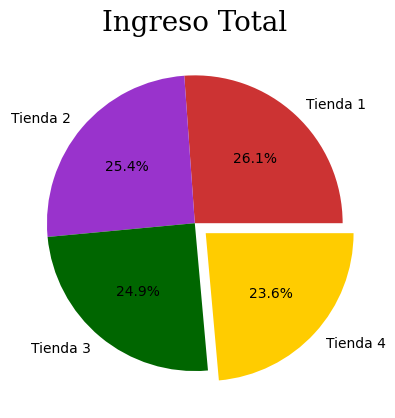

In [142]:
# Graficas que compara el ingreso total.
myexplode = [0,0,0,0.1]
pieTiendas(tablaDatos,'Ingreso Total', 'Ingreso Total', myexplode)

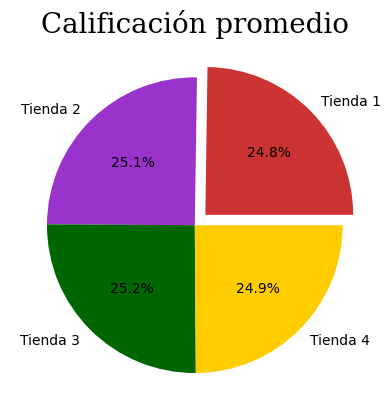

In [143]:
myexplode = [0.1,0,0,0]
pieTiendas(tablaDatos,'Calificación promedio', 'Calificación promedio', myexplode)

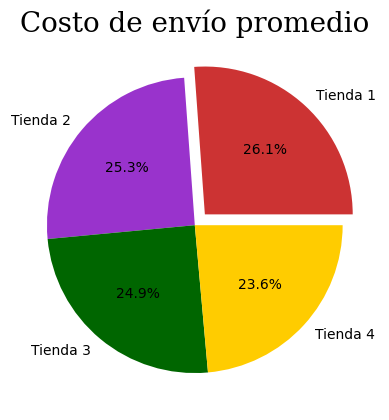

In [144]:
myexplode = [0.1,0,0,0]
pieTiendas(tablaDatos,'Costo de envío promedio', 'Costo de envío promedio', myexplode)

### Analisis de los ingresos, costos de envio y calificación.

Podemos notar que en terminos de porcentaje tablaDatosPorcentaje que tanto en ingresos totales como ingresos brutos (despues de costos de envio), la cuarta tienda nos da un menor ingreso.

No obstante de la tabla de datos tablaDatos que los datos no son distantes en cuestion de calificacion e ingresos brutos, pero la primera tienda tiene un costo de ventas mayor. Por lo que, puede ver en las graficas de pie de las tiendas se puede ver que:

***
- **Tienda 1:** Menor calificación, mayor ingreso total y costo de envió.
- **Tienda 2:** Tiene una calificación regular, menor ingreso total y costo de envió.
- **Tienda 3:** Tiene la mejor calificación pero no es distante de la tienda 2 asi como los ingreso totales y costos de envió.
***

In [145]:
# Ordenamos el DataFrame por la suma total de ventas (de mayor a menor)
tablaOrdenadav = tablaDeCategorias.copy()
tablaOrdenadav = tablaOrdenadav.drop(["Ingreso total (tienda 1)", "Ingreso total (tienda 2)", "Ingreso total (tienda 3)", "Ingreso total (tienda 4)"],axis=1)
tablaOrdenadav["Total"] = tablaOrdenadav.sum(axis=1)
tablaOrdenadav = tablaOrdenadav.sort_values("Total", ascending=True)

# Categorías ya ordenadas
categorias = tablaOrdenadav.index

In [146]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Bar(
    y=categorias,
    x=tablaOrdenadav['Ventas (tienda 1)'],
    name='Tienda 1',
    orientation='h',
    marker=dict(color='#CC3333'),
    text=tablaOrdenadav['Ventas (tienda 1)'],
    textposition='outside'
))

fig.add_trace(go.Bar(
    y=categorias,
    x=tablaOrdenadav['Ventas (tienda 2)'],
    name='Tienda 2',
    orientation='h',
    marker=dict(color='#9933CC'),
    text=tablaOrdenadav['Ventas (tienda 2)'],
    textposition='outside'
))

fig.add_trace(go.Bar(
    y=categorias,
    x=tablaOrdenadav['Ventas (tienda 3)'],
    name='Tienda 3',
    orientation='h',
    marker=dict(color='#006600'),
    text=tablaOrdenadav['Ventas (tienda 3)'],
    textposition='outside'
))

fig.add_trace(go.Bar(
    y=categorias,
    x=tablaOrdenadav['Ventas (tienda 4)'],
    name='Tienda 4',
    orientation='h',
    marker=dict(color='#FFCC00'),
    text=tablaOrdenadav['Ventas (tienda 4)'],
    textposition='outside'
))

# Layout
fig.update_layout(
    title='CATEGORÍAS MÁS POPULARES',
    barmode='group',
    yaxis=dict(title='Categorías'),
    xaxis=dict(title='Ventas'),
    legend=dict(x=1.05, y=0.5)
)

fig.show()

In [147]:
tablaDatosCategoria

,Nombre de las Tiendas,Categoría con mayor Ingreso,Ingreso Total (max),Ventas de la categoría (max),Categoría con menor Ingreso,Ingreso Total (min),Ventas de la categoría (min),Ingreso Total (max + min),Categoría con mayor ventas,Ventas (max),Ingreso de la categoría (max),Categoría con menor ventas,Ventas (min),Ingreso de la categoría (min),Ventas (max + min)
0,Tienda 1,Electrónicos,429493500.0,448,Libros,8784900.0,173,438278400.0,Muebles,465,187633700.0,Artículos para el hogar,171,12698400.0,636
1,Tienda 2,Electrónicos,410831100.0,422,Libros,10091200.0,197,420922300.0,Muebles,442,176426300.0,Artículos para el hogar,181,14746900.0,623
2,Tienda 3,Electrónicos,410775800.0,451,Libros,9498700.0,185,420274500.0,Muebles,499,201072100.0,Artículos para el hogar,177,15060000.0,676
3,Tienda 4,Electrónicos,409476100.0,451,Libros,9321300.0,187,418797400.0,Muebles,480,192528900.0,Instrumentos musicales,170,75102400.0,650


### Analisis de las categorías populares.

En la tabla anterior tablaDatosCategoria se observa que todas las tienedas tiene como mayor ingreso la categoría de **Electrónicos** y con mayores ventas **Muebles**. Es importante recalcar que los ingresos no siempre son lo más importante, ya que no sabemos los ingresos de costos para la tienda. Esto no implica que las mayores ventas importen pero al tener una vista más completa de las categorías más populares podemos ver que tienda vende más según la categoría popular.

En la grafíca Categorías más populares se puede observar que las categorías más populares son:

1. Muebles
1. Electrónicos
1. Juguetes
1. Electrodomésticos

Podemos ver de los datos que la ctegoría de electrónicos es la segunda ctegoría con más ventas y la mayor categoría de ventas. Además podemos ver que las ventas son similares.

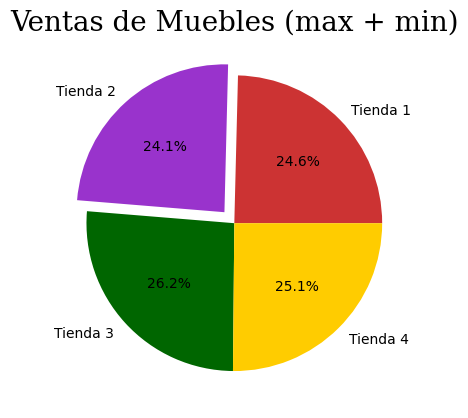

In [148]:
myexplode = [0,0.1,0,0]
pieTiendas(tablaDatosCategoria,'Ventas (max + min)', 'Ventas de Muebles (max + min)', myexplode)

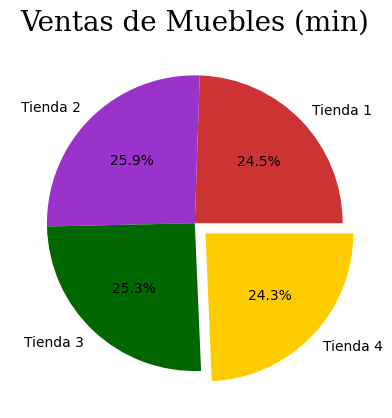

In [149]:
myexplode = [0,0,0,0.1]
pieTiendas(tablaDatosCategoria,'Ventas (min)', 'Ventas de Muebles (min)', myexplode)

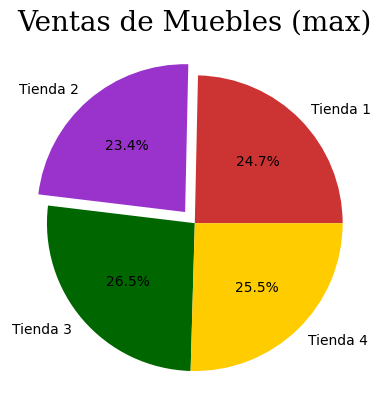

In [150]:
myexplode = [0,0.1,0,0]
pieTiendas(tablaDatosCategoria,'Ventas (max)', 'Ventas de Muebles (max)', myexplode)

In [151]:
# Diferencia de ventas maxima de las tiendas.
tablaDatosCategoria['Ventas (max)'].max() - tablaDatosCategoria['Ventas (max)'].min()

57

In [152]:
# # Diferencia de ventas minimas de las tiendas.
tablaDatosCategoria['Ventas (min)'].max() - tablaDatosCategoria['Ventas (min)'].min()

11

### Analisis de las ventas categoría popular.

Poedemos notar el general que casi todas las tiendas tienen una venta minima similar donde:

 - Diferencia de ventas min de las tiendas son **11.**
 - Diferencia de ventas max de las tiendas son **57.**
 - En general de las ventas max y min la **tienda 2 tiene menos ventas.**
***
Particularmente note de las tiendas:
 1. **Tienda 2:** Genera más ventas minimas y menos ventas maximas. Pero en general la suma de sus ventas min y max son menor.

 1. **Tienda 4:** Genera menos ventas minimas, y  es la segunda tienda con mayores ventas max. En general, tiene ventas medias.

 1. **Tienda 1:** Ventas generales promedio, ventas min promedio y genera mas ventas max.

 1. **Tienda 3:** Ventas generales promedio.
***

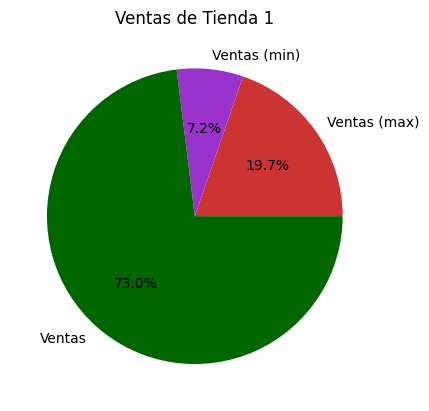

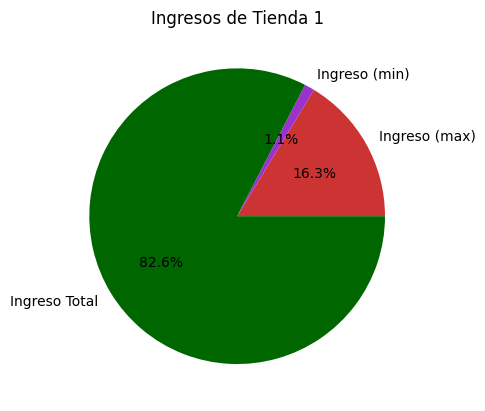

In [153]:
pieVentaMm(ventasCategoriaPopular,'Tienda 1','Ventas de Tienda 1')
pieIngresoMm(ingresosCategoriaPopular,'Tienda 1','Ingresos de Tienda 1')

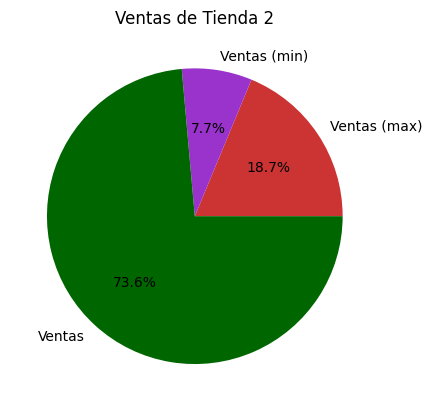

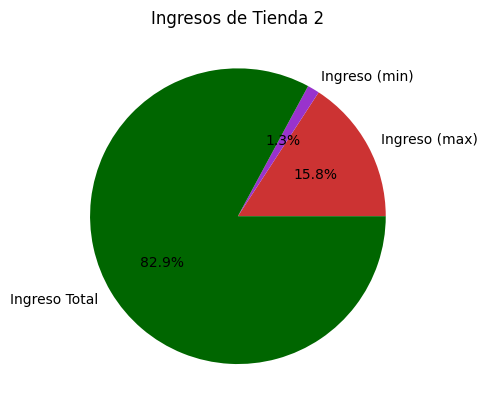

In [154]:
pieVentaMm(ventasCategoriaPopular,'Tienda 2','Ventas de Tienda 2')
pieIngresoMm(ingresosCategoriaPopular,'Tienda 2','Ingresos de Tienda 2')

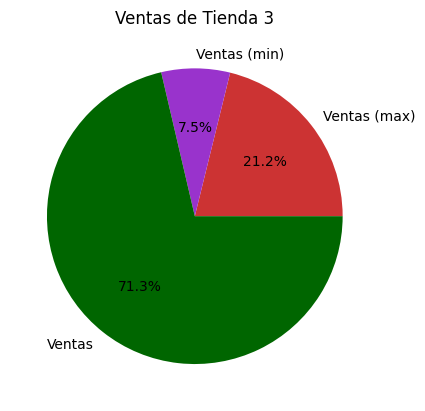

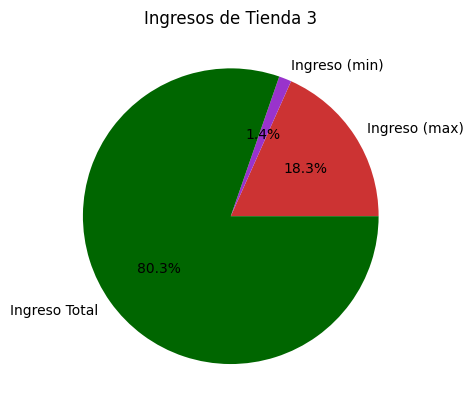

In [155]:
pieVentaMm(ventasCategoriaPopular,'Tienda 3','Ventas de Tienda 3')
pieIngresoMm(ingresosCategoriaPopular,'Tienda 3','Ingresos de Tienda 3')

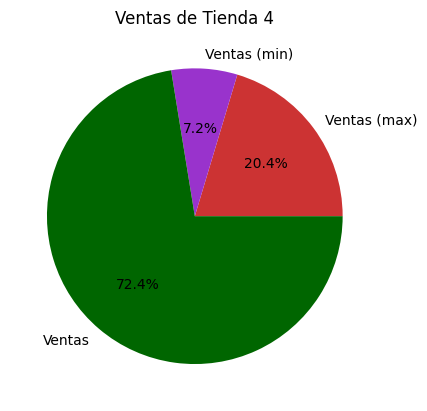

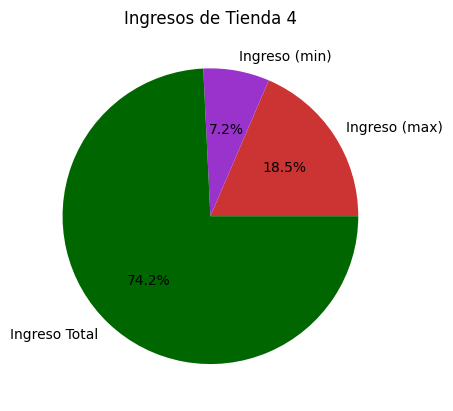

In [156]:
pieVentaMm(ventasCategoriaPopular,'Tienda 4','Ventas de Tienda 4')
pieIngresoMm(ingresosCategoriaPopular,'Tienda 4','Ingresos de Tienda 4')

### Analisis de las ventas respecto a los ingresos de la categoría popular.
En general, podemos notar que los ingresos de la categoría co menos ventas representan un porcentaje despresiable del ingreso total obtenido, es decir, aproximadamente 1.4%, excepto la cuarta tienda. Asi mismo la categoría mas popular representa un ingreso considerable de nuestro total aproximadamanete un 20%.

Es facil ver que **los ingresos en comparación con las ventas de la segunda tienda es desfavorable** pues las ventas minimas represnetan un ingreso despreciable y representa cun porcentaje de ventas mayor despreciable en combparación a las demás tiendas, así mismo las ventas maximas representan un ingreso menor en comparación con las demas tiendas.
***
En conlusión:

1. **Tienda 1:** Sus ingreso respecto a ventas son regulares.
1. **Tienda 2:** Sus ingreso respecto a ventas son bajos en comparación.
1. **Tienda 3:** Sus ingreso respecto a ventas son regulares.
1. **Tienda 4:** Sus ingreso respecto a ventas son altos.
***
Analogamente se puede hacer un analisi con la categoría con mayor ingreso.

In [157]:
tablaDatosProducto

,Nombre de las Tiendas,Producto con más ingreso,Ingreso del producto (max),Productos vendidos (max),Producto con menos ingreso,Ingreso del producto (min),Productos vendidos (min),Producto con más ventas,Ventas del producto (max),Ingresos de la venta (max),Producto con menos ventas,Ventas del producto (min),Ingresos de la venta (min)
0,Tienda 1,TV LED UHD 4K,142150200.0,60,Cuerda para saltar,652800.0,40,Armario,60,29462300.0,Auriculares con micrófono,33,4730800.0
1,Tienda 2,Iphone 15,113225800.0,55,Cubo mágico 8x8,643600.0,45,Iniciando en programación,65,3127800.0,Juego de mesa,32,5811900.0
2,Tienda 3,Refrigerador,99889700.0,50,Cubo mágico 8x8,640400.0,44,Kit de bancas,57,16699800.0,Bloques de construcción,35,1237200.0
3,Tienda 4,Iphone 15,96697500.0,48,Cuerda para saltar,704800.0,43,Cama box,62,32946300.0,Guitarra eléctrica,33,25823100.0


In [158]:
categoriaProducto(tienda2,'Iniciando en programación')

'Libros'

In [159]:
categoriaProducto(tienda2,'Juego de mesa')

'Juguetes'

### Analisis de los prodcutos vendidos.

Podemos ver de las tablas anteriores que la segunda y tercera tienda genera menos ingresos de la categoría de juguetes una de las categorías populares Categorías más populares y la primera y cuarta tienda de la categoría de  Deportes y diversión una categoría no tan popular.

Además la segunda tienda tiene como producto con mayor ventas un producto de la categoría libros y con menos ventas un producto de la categoría de jueguestes, las demás tiendas son congurentes con sus ventas su prodcuto con mayor ventas es de la categoría de muebles y los de menores ventas son de ontrumentos musicales excepto la tercera tienda donde su producto con menos ventas es de la categoría de juguetes.

Finalmente los ingresos mayores por prodcto correcponde a productos electronicos.

***
1. **Tienda 1** : Tiene mayores ventas en un producto de **Muebles**, menores ventas en un producto de **intrumentos musicales**.
1. **Tienda 2** : Tiene mayores ventas en un producto de **Libros**, menores ventas en un producto de **Juguetes**.
1. **Tienda 3** : Tiene mayores ventas en un producto de **Muebles**, menores ventas en un producto de **Juguetes**.
1. **Tienda 4** : Tiene mayores ventas en un producto de **Mubles**, menores ventas en un producto de **intrumentos musicales**.
***

In [160]:
topUbicacion1

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Lugar de Compra,,,,
Bogotá,984,985,983,991
Medellín,563,594,580,577
Cali,283,222,248,254
Pereira,133,128,134,122


In [201]:
fig = go.Figure()

countColor = 0
for tienda in tablaUbicacion.columns:
    fig.add_trace(go.Bar(
        y=tablaUbicacion.index,
        x=tablaUbicacion[tienda],
        orientation="h",
        name=tienda,
        marker=dict(color=mycolors[countColor]),
        text=tablaUbicacion[tienda],
        textposition="outside"
    ))
    countColor += 1

# Ajustes de diseño
fig.update_layout(
    title="UBICACIONES MÁS POPULARES",
    xaxis=dict(visible=False),
    yaxis=dict(title="Ubicación"),
    legend=dict(x=1.05, y=0.5),

    width=900,   # ancho en pixeles
    height=1200,  # alto en pixeles
    bargap=0.1,   # espacio entre grupos de barras (0 = pegadas, 1 = separadas)
    bargroupgap=0.1 # espacio dentro del mismo grupo de categorías
)


In [162]:
topUbicacion1

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Lugar de Compra,,,,
Bogotá,984,985,983,991
Medellín,563,594,580,577
Cali,283,222,248,254
Pereira,133,128,134,122


In [163]:
tablaDatos['Media de las ubicacion (top 4)'] = [round(tablaUbicacion[tienda].mean(),2) for tienda in tablaDatos.index]
tablaDatos

,Ingreso Total,Ingreso Bruto,Ventas Totales,Calificación promedio,Costo de envío promedio,Lugar de con mayor compra,Media de las ubicacion (top 4)
Tienda 1,1.150880e+09,1.089502e+09,2359,3.98,26018.61,Bogotá,124.16
Tienda 2,1.116344e+09,1.056858e+09,2359,4.04,25216.24,Bogotá,124.16
Tienda 3,1.098020e+09,1.039503e+09,2359,4.05,24805.68,Bogotá,124.16
Tienda 4,1.038376e+09,9.830583e+08,2358,4.00,23459.46,Bogotá,124.11


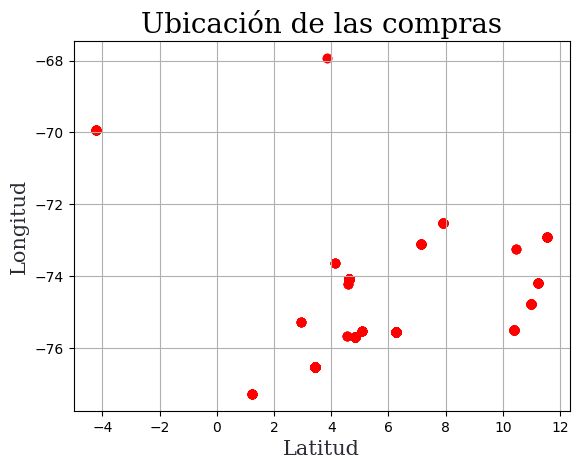

In [171]:
distrubucionUbicacion(tienda2,'red')

### Analisis de la Ubicacion de las tiendas.

En general el top de las ubicaciones es el mismo en las diferentes tiendas por lo que basta ver que su media es similar 124 ventas por top 4 de ubicación, sin embargo, tambien es facil ver que los datos son muy similares en la tabla.

# Resultado del Analisis.

En un inicio, los datos sugieren que las tiendas 1 y 4 podrían ser candidatas ideales. Sin embargo, la tienda 1 presenta desventajas importantes: baja calificación frente a las demás y un costo de envío más alto. Por su parte, la tienda 4 registra menores ingresos.

Al profundizar en las ventas e ingresos por categoría, se observa que la tienda 2 tiene un desempeño más débil en ventas máximas y mínimas, además de un ingreso menor. Aun así, sus calificaciones y costos de envío son similares a los de la tienda 1.

La tienda 4, en cambio, muestra un comportamiento más equilibrado: sus ventas mínimas son bajas y las máximas altas, pero los ingresos resultan proporcionales, incluso sorprendentemente consistentes con su nivel de popularidad.

Las demás tiendas presentan coherencia entre ingresos y ventas. Solo la tienda 3 rompe este patrón, ya que su producto menos vendido pertenece a una categoría popular.

En conclusión, aunque la ubicación y los ingresos apuntan a una decisión entre las tiendas 2 y 4, se opta por la tienda 2, principalmente por su mejor relación entre ingresos y ventas, pese a que la tienda 4 tenga ingresos menores pero más proporcionales a sus ventas.

***Recomendación final: vender en la Tienda 2.***